# COVID-19 modelling

## Imports

In [1]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline

## SIR Model

Variables:
- S - Susceptible
- I - infected
- R - recovered

Parameters:
- transmission_rate
- recovery_rate

Equations:
- dS/dt(t,S,I,R) = - transmission_rate * S * I
- dI/dt(t,S,I,R) = transmission_rate * S * I - recovery_rate * I
- dR/dt(t,S,I,R) = recovery_rate * I

### Parameters

In [2]:
S0 = 0.99
I0 = 0.01
R0 = 0
transmission_rate = 3.2
recovery_rate = 0.23

### Equations

In [3]:
def sir(y, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        y :  vector of the state variables: y = [S, I, R]
        t :  time
        p :  vector of the parameters: p = [transmission_rate, recovery_rate]
    """
    S, I, R = y
    transmission_rate, recovery_rate = p

    # Create dy/dt vector
    f = [
        - transmission_rate * S * I,
        transmission_rate * S * I - recovery_rate * I,
        recovery_rate * I
        ]
    
    return f

### Solve system of ODEs

In [4]:
# ODE solver parameters
t_final = 10
ndp = 100

# Create the time samples for the output of the ODE solver
# t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
t = np.linspace(0, t_final, ndp)

# Pack up the parameters and initial conditions:
p = [transmission_rate, recovery_rate]
y0 = [S0, I0, R0]

# Call the ODE solver
ysol = odeint(sir, y0, t, args=(p,))

S, I, R = [], [], []
for y in ysol:
    S.append(y[0])
    I.append(y[1])
    R.append(y[2])

### Plot

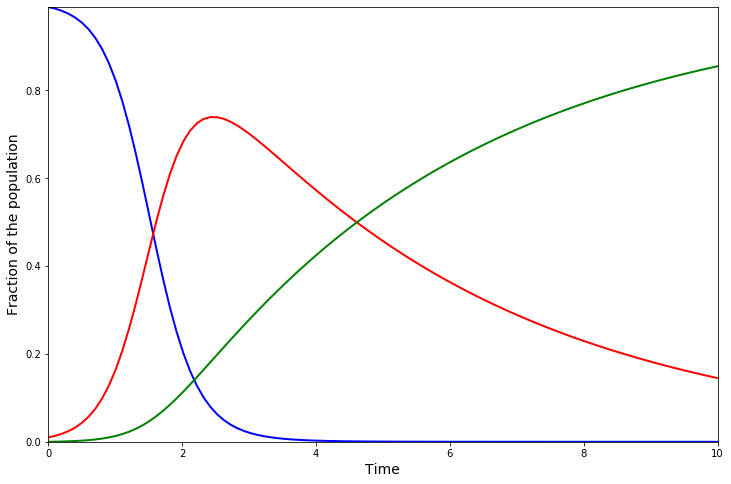

In [5]:
figsize(12, 8)

# Style parameters
lw = 2  # line width

plt.plot(t, S, 'b', linewidth=lw);
plt.plot(t, I, 'r', linewidth=lw);
plt.plot(t, R, 'g', linewidth=lw);

plt.margins(0)
plt.ylabel('Fraction of the population', fontsize=14)
plt.xlabel('Time', fontsize=14);

## Interactive

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

figsize(12, 8)

def intereactive_time(time_point):    
    _t = t[:time_point]
    _S = S[:time_point]
    _I = I[:time_point]
    _R = R[:time_point]
    
    plt.plot(_t, _S, 'b', linewidth=lw)
    plt.plot(_t, _I, 'r', linewidth=lw)
    plt.plot(_t, _R, 'g', linewidth=lw)
    
    plt.xlim(0, 10)
    plt.ylim(0, 1)
    plt.margins(0)
    plt.ylabel('Fraction of the population', fontsize=14)
    plt.xlabel('Time', fontsize=14);

interact(intereactive_time, time_point=widgets.IntSlider(value=1, min=1, max=100, step=1));

interactive(children=(IntSlider(value=1, description='time_point', min=1), Output()), _dom_classes=('widget-in…

In [7]:
figsize(12, 8)

def interactive_rates(final_time, transmission, recovery):
    # Create the time samples for the output of the ODE solver
    t = np.linspace(0, final_time, ndp)

    # Pack up the parameters and initial conditions:
    p = [transmission, recovery]
    y0 = [S0, I0, R0]

    # Call the ODE solver
    ysol = odeint(sir, y0, t, args=(p,))

    S, I, R = [], [], []
    for y in ysol:
        S.append(y[0])
        I.append(y[1])
        R.append(y[2])
    
    plt.plot(t, S, 'b', linewidth=lw);
    plt.plot(t, I, 'r', linewidth=lw);
    plt.plot(t, R, 'g', linewidth=lw);
    
    plt.xlim(0, final_time)
    plt.ylim(0, 1)
    plt.margins(0)
    plt.ylabel('Fraction of the population', fontsize=20)
    plt.xlabel('Time', fontsize=20);

interact(interactive_rates, 
         final_time=widgets.IntSlider(value=10, min=1, max=100, step=1),
         transmission=widgets.FloatSlider(value=3.2, min=0.1, max=10, step=0.1),
         recovery=widgets.FloatSlider(value=0.23, min=0, max=5, step=0.1));

interactive(children=(IntSlider(value=10, description='final_time', min=1), FloatSlider(value=3.2, description…